## **Chinelo Osuji**
**Broward College**


# **Using Autoregression (AR) with Statsmodels Library for Monthly Electricity/Gas Prices and Weather Temperature Forecasts in South Florida**

**Average Price: Electricity per Kilowatt-Hour in Miami-Fort Lauderdale-West Palm Beach, FL**

**APUS35B72610.csv can be downloaded from** https://fred.stlouisfed.org/series/APUS35B72610


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = 'APUS35B72610.csv'
electricity = pd.read_csv(file_path,index_col='DATE', parse_dates=True)
electricity.index.freq = 'MS'

In [ ]:
electricity

,APUS35B72610
DATE,
1978-11-01,0.046
1978-12-01,0.043
1979-01-01,0.043
1979-02-01,0.045
1979-03-01,0.047
...,...
2023-09-01,0.158
2023-10-01,0.158
2023-11-01,0.158


In [ ]:
electricity.rename(columns={'APUS35B72610': 'ELECTRICITY'}, inplace=True)

In [ ]:
electricity.dtypes

ELECTRICITY    object
dtype: object

In [ ]:
electricity['ELECTRICITY'] = pd.to_numeric(electricity['ELECTRICITY'], errors='coerce')

In [ ]:
electricity[electricity.isnull().any(axis=1)]

,ELECTRICITY
DATE,
1985-09-01,NaN
2019-09-01,NaN


In [ ]:
electricity.interpolate(method='time', inplace=True)

In [ ]:
electricity.isnull().sum()

ELECTRICITY    0
dtype: int64

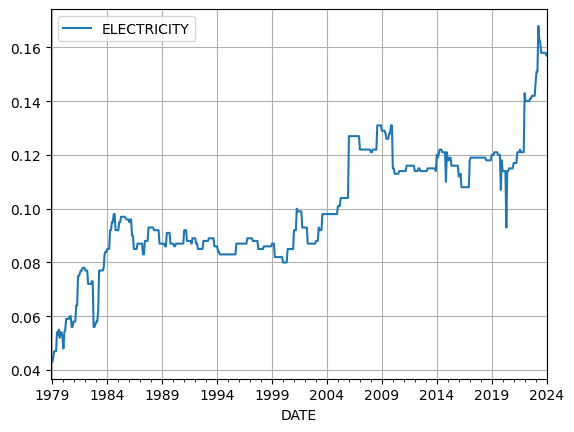

In [ ]:
electricity.plot()
plt.grid(True)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
len(electricity)

543

In [ ]:
543-108

435

In [ ]:
train = electricity.iloc[:435]
test = electricity.iloc[435:]

In [ ]:
train

,ELECTRICITY
DATE,
1978-11-01,0.046
1978-12-01,0.043
1979-01-01,0.043
1979-02-01,0.045
1979-03-01,0.047
...,...
2014-09-01,0.121
2014-10-01,0.121
2014-11-01,0.110


In [ ]:
test

,ELECTRICITY
DATE,
2015-02-01,0.118
2015-03-01,0.119
2015-04-01,0.119
2015-05-01,0.116
2015-06-01,0.116
...,...
2023-09-01,0.158
2023-10-01,0.158
2023-11-01,0.158


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = AutoReg(train['ELECTRICITY'], lags=10)

In [ ]:
elec_fit = model.fit()

In [ ]:
start = test.index[0]
end = test.index[-1]

In [ ]:
start

Timestamp('2015-02-01 00:00:00', freq='MS')

In [ ]:
end

Timestamp('2024-01-01 00:00:00', freq='MS')

In [ ]:
elec_fit.predict(start=start,end=end)

2015-02-01    0.118083
2015-03-01    0.117938
2015-04-01    0.118061
2015-05-01    0.118379
2015-06-01    0.117508
                ...   
2023-09-01    0.108420
2023-10-01    0.108377
2023-11-01    0.108335
2023-12-01    0.108293
2024-01-01    0.108252
Freq: MS, Length: 108, dtype: float64

In [ ]:
elec_predictions1 = elec_fit.predict(start=start,end=end)
elec_predictions1 = elec_predictions1.rename('AR(1) Electricity Predictions')

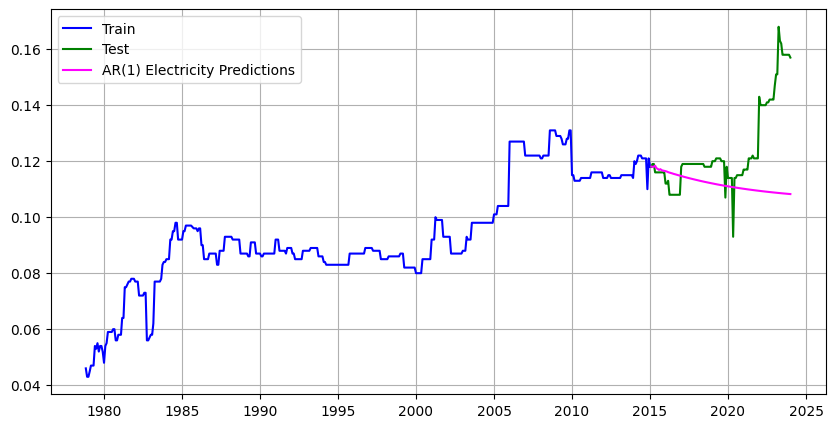

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['ELECTRICITY'], label='Train', color='blue')  # Plot training data
plt.plot(test.index, test['ELECTRICITY'], label='Test', color='green')  # Plot test data
plt.plot(test.index, elec_predictions1, label='AR(1) Electricity Predictions', color='magenta')  # Plot predictions
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model2 = AutoReg(train['ELECTRICITY'], lags=60)

In [ ]:
elec_fit2 = model2.fit()

In [ ]:
elec_predictions2 = elec_fit2.predict(start=start,end=end)
elec_predictions2 = elec_predictions2.rename('AR(2) Electricity Predictions')

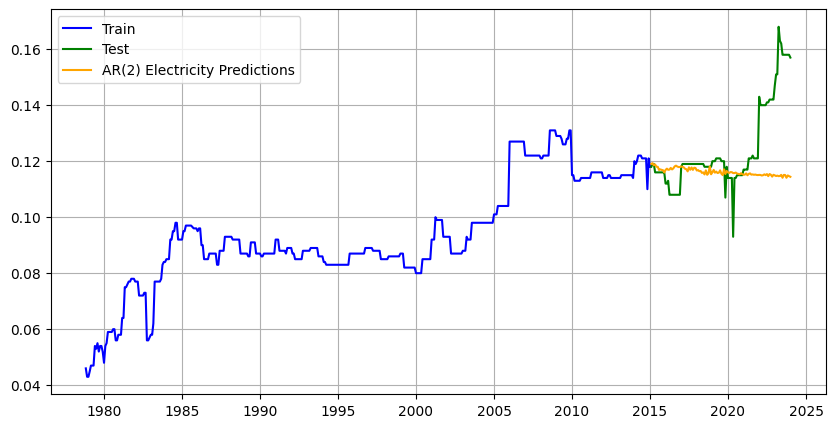

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['ELECTRICITY'], label='Train', color='blue')  # Plot training data
plt.plot(test.index, test['ELECTRICITY'], label='Test', color='green')  # Plot test data
plt.plot(test.index, elec_predictions2, label='AR(2) Electricity Predictions', color='orange')  # Plot predictions
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model3 = AutoReg(train['ELECTRICITY'], lags=110)

In [ ]:
elec_fit3 = model3.fit()

In [ ]:
elec_fit3.params

const              -0.000169
ELECTRICITY.L1      0.895625
ELECTRICITY.L2      0.086476
ELECTRICITY.L3     -0.076199
ELECTRICITY.L4      0.091533
                      ...   
ELECTRICITY.L106   -0.086391
ELECTRICITY.L107    0.159349
ELECTRICITY.L108   -0.054887
ELECTRICITY.L109    0.059774
ELECTRICITY.L110   -0.033817
Length: 111, dtype: float64

In [ ]:
elec_predictions3 = elec_fit3.predict(start=start,end=end)
elec_predictions3 = elec_predictions3.rename('AR(3) Electricity Predictions')

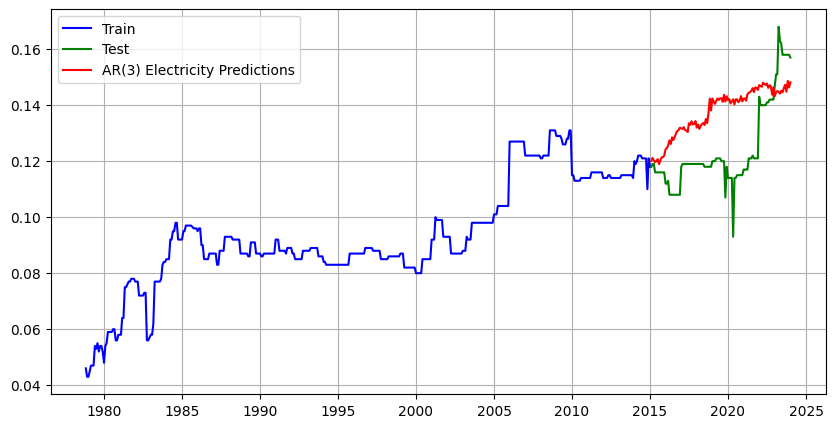

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['ELECTRICITY'], label='Train', color='blue')  # Plot training data
plt.plot(test.index, test['ELECTRICITY'], label='Test', color='green')  # Plot test data
plt.plot(test.index, elec_predictions3, label='AR(3) Electricity Predictions', color='red')  # Plot predictions
plt.grid(True)
plt.legend()
plt.show()

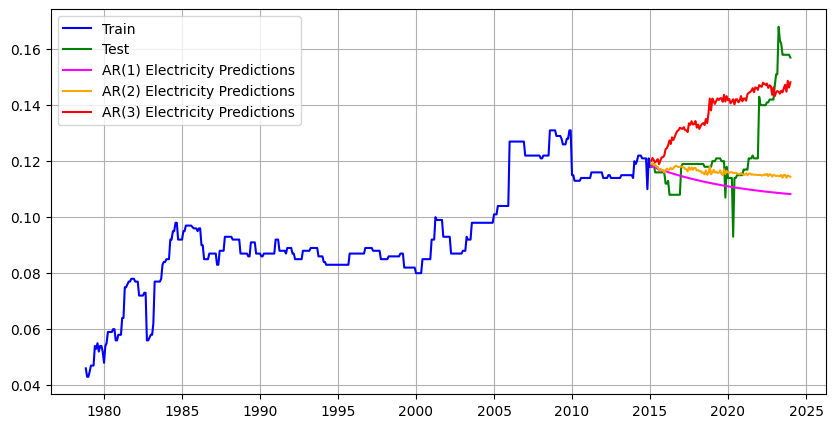

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['ELECTRICITY'], label='Train', color='blue')
plt.plot(test.index, test['ELECTRICITY'], label='Test', color='green')
plt.plot(test.index, elec_predictions1, label='AR(1) Electricity Predictions', color='Magenta')
plt.plot(test.index, elec_predictions2, label='AR(2) Electricity Predictions', color='Orange')
plt.plot(test.index, elec_predictions3, label='AR(3) Electricity Predictions', color='Red')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
labels = ['AR(1) Electricity Predictions','AR(2) Electricity Predictions','AR(3) Electricity Predictions']

In [ ]:
preds = [elec_predictions1,elec_predictions2,elec_predictions3]

In [ ]:
for i in range(3):
    mse = mean_squared_error(test['ELECTRICITY'], preds[i])
    mae = mean_absolute_error(test['ELECTRICITY'], preds[i])
    rmse = sqrt(mse)  # RMSE is just the square root of the MSE

    print(f'{labels[i]} MSE: {mse}')
    print(f'{labels[i]} MAE: {mae}')
    print(f'{labels[i]} RMSE: {rmse}\n')

AR(1) Electricity Predictions MSE: 0.00044080049189177523
AR(1) Electricity Predictions MAE: 0.014036813478800278
AR(1) Electricity Predictions RMSE: 0.020995249269579422

AR(2) Electricity Predictions MSE: 0.00031858605404984613
AR(2) Electricity Predictions MAE: 0.010846866745740754
AR(2) Electricity Predictions RMSE: 0.017848979075842018

AR(3) Electricity Predictions MSE: 0.0003432932933417919
AR(3) Electricity Predictions MAE: 0.016355065183182523
AR(3) Electricity Predictions RMSE: 0.018528175661456578



In [ ]:
electricity_forecasted_values = elec_fit.predict(start=len(electricity),end=len(electricity)+60).rename('AR1 Electricity Forecast')
electricity_forecasted_values2 = elec_fit2.predict(start=len(electricity),end=len(electricity)+60).rename('AR2 Electricity Forecast')
electricity_forecasted_values3 = elec_fit3.predict(start=len(electricity),end=len(electricity)+60).rename('AR3 Electricity Forecast')

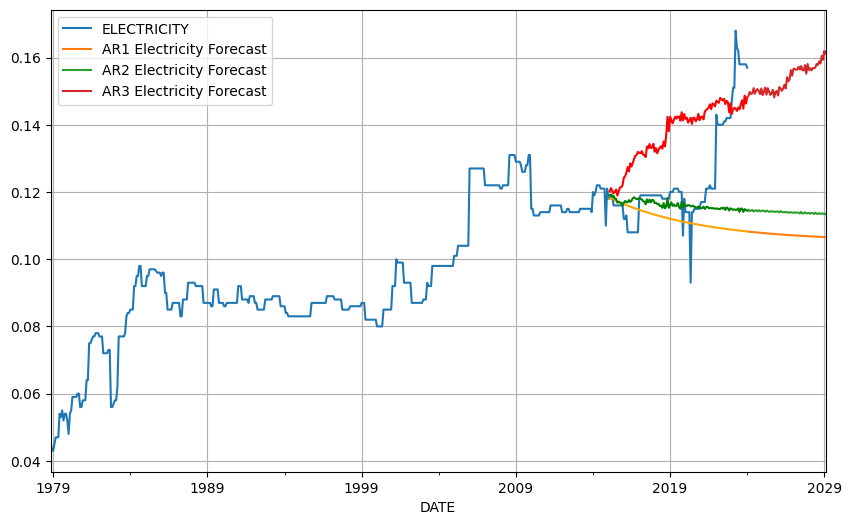

In [ ]:
electricity['ELECTRICITY'].plot(figsize=(10,6),legend=True)
electricity_forecasted_values.plot(legend=True)
electricity_forecasted_values2.plot(legend=True)
electricity_forecasted_values3.plot(legend=True)
elec_predictions1.plot(color='orange')
elec_predictions2.plot(color='green')
elec_predictions3.plot(color='red')
plt.grid(True)

In [ ]:
# Create a range of future dates
last_date = electricity.index[-1]  # Get the last date in your DataFrame
first_date = electricity.index[0]
future_dates = pd.date_range(start=last_date, periods=60, freq='MS')[1:]  # Create 60 new monthly dates

In [ ]:
# Extend the DataFrame
future_electricity = pd.DataFrame(index=future_dates, columns=electricity.columns)  # Create a new DataFrame for the future dates
extended_electricity = pd.concat([electricity, future_electricity])  # Concatenate the existing and future DataFrames

In [ ]:
# Append forecasted values
extended_electricity.loc[future_dates, 'AR1 Electricity Forecast'] = electricity_forecasted_values[:len(future_dates)].values
extended_electricity.loc[future_dates, 'AR2 Electricity Forecast'] = electricity_forecasted_values2[:len(future_dates)].values
extended_electricity.loc[future_dates, 'AR3 Electricity Forecast'] = electricity_forecasted_values3[:len(future_dates)].values

In [ ]:
extended_electricity['AR1 Electricity Forecast'] = extended_electricity['AR1 Electricity Forecast'].astype('float')
extended_electricity['AR2 Electricity Forecast'] = extended_electricity['AR2 Electricity Forecast'].astype('float')
extended_electricity['AR3 Electricity Forecast'] = extended_electricity['AR3 Electricity Forecast'].astype('float')

In [ ]:
extended_electricity[['ELECTRICITY', 'AR1 Electricity Forecast', 'AR2 Electricity Forecast', 'AR3 Electricity Forecast']]['2023-06-01':'2025-02-01']

,ELECTRICITY,AR1 Electricity Forecast,AR2 Electricity Forecast,AR3 Electricity Forecast
2023-06-01,0.162,NaN,NaN,NaN
2023-07-01,0.158,NaN,NaN,NaN
2023-08-01,0.158,NaN,NaN,NaN
2023-09-01,0.158,NaN,NaN,NaN
2023-10-01,0.158,NaN,NaN,NaN
2023-11-01,0.158,NaN,NaN,NaN
2023-12-01,0.158,NaN,NaN,NaN
2024-01-01,0.157,NaN,NaN,NaN
2024-02-01,NaN,0.108212,0.114722,0.148653
2024-03-01,NaN,0.108172,0.114301,0.149764


**Average Price: Utility (Piped) Gas per Therm in Miami-Fort Lauderdale-West Palm Beach, FL**

**APUS35B72620.csv can be downloaded from** https://fred.stlouisfed.org/series/APUS35B72620

In [ ]:
file_path2 = 'APUS35B72620.csv'
gas = pd.read_csv(file_path2,index_col='DATE', parse_dates=True)
gas.index.freq = 'MS'

In [ ]:
gas

,APUS35B72620
DATE,
1978-11-01,0.617
1978-12-01,0.647
1979-01-01,0.650
1979-02-01,0.650
1979-03-01,0.650
...,...
2023-09-01,3.080
2023-10-01,3.087
2023-11-01,3.055


In [ ]:
gas.rename(columns={'APUS35B72620': 'GAS'}, inplace=True)

In [ ]:
gas.dtypes

GAS    object
dtype: object

In [ ]:
gas['GAS'] = pd.to_numeric(gas['GAS'], errors='coerce')

In [ ]:
gas[gas.isnull().any(axis=1)]

,GAS
DATE,
1985-09-01,NaN
2012-10-01,NaN
2018-02-01,NaN
2018-03-01,NaN
2018-04-01,NaN
2018-05-01,NaN
2018-06-01,NaN
2018-07-01,NaN
2018-08-01,NaN


In [ ]:
gas.interpolate(method='time', inplace=True)

In [ ]:
gas.isnull().sum()

GAS    0
dtype: int64

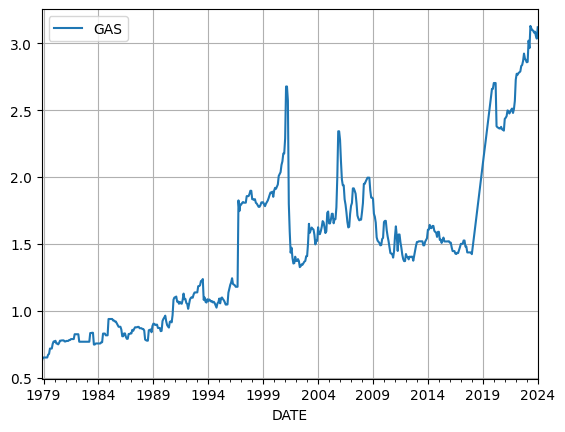

In [ ]:
gas.plot()
plt.grid(True)

In [ ]:
len(gas)

543

In [ ]:
543-108

435

In [ ]:
train = gas.iloc[:435]
test = gas.iloc[435:]

In [ ]:
train

,GAS
DATE,
1978-11-01,0.617
1978-12-01,0.647
1979-01-01,0.650
1979-02-01,0.650
1979-03-01,0.650
...,...
2014-09-01,1.589
2014-10-01,1.585
2014-11-01,1.552


In [ ]:
test

,GAS
DATE,
2015-02-01,1.530
2015-03-01,1.531
2015-04-01,1.507
2015-05-01,1.529
2015-06-01,1.547
...,...
2023-09-01,3.080
2023-10-01,3.087
2023-11-01,3.055


In [ ]:
model = AutoReg(train['GAS'], lags=60)

In [ ]:
gas_fit = model.fit()

In [ ]:
start = test.index[0]  # Start at the beginning of the test set
end = test.index[-1]  # End at the last point of the test set

In [ ]:
start

Timestamp('2015-02-01 00:00:00', freq='MS')

In [ ]:
end

Timestamp('2024-01-01 00:00:00', freq='MS')

In [ ]:
gas_fit.predict(start=start,end=end)

2015-02-01    1.626401
2015-03-01    1.634679
2015-04-01    1.631968
2015-05-01    1.629581
2015-06-01    1.644954
                ...   
2023-09-01    1.610568
2023-10-01    1.610445
2023-11-01    1.616175
2023-12-01    1.615506
2024-01-01    1.607010
Freq: MS, Length: 108, dtype: float64

In [ ]:
gas_predictions1 = gas_fit.predict(start=start,end=end)
gas_predictions1 = gas_predictions1.rename('AR(1) Gas Predictions')

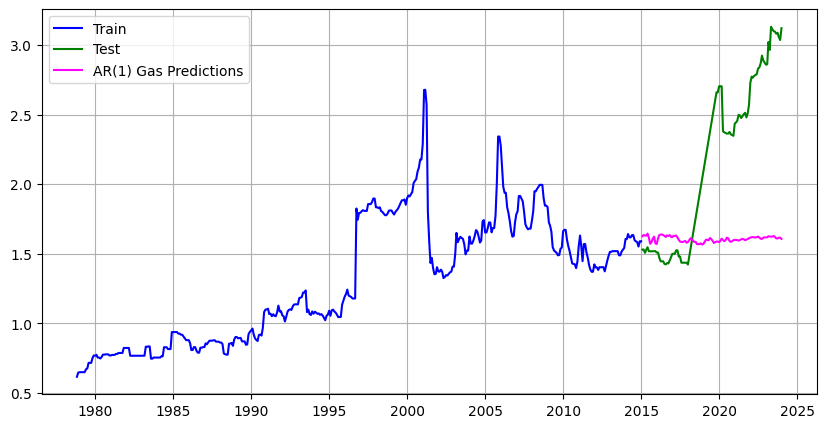

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['GAS'], label='Train', color='blue')  # Plot training data
plt.plot(test.index, test['GAS'], label='Test', color='green')  # Plot test data
plt.plot(test.index, gas_predictions1, label='AR(1) Gas Predictions', color='Magenta')  # Plot predictions
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model2 = AutoReg(train['GAS'], lags=110)

In [ ]:
gas_fit2 = model2.fit()

In [ ]:
gas_predictions2 = gas_fit2.predict(start=start,end=end)
gas_predictions2 = gas_predictions2.rename('AR(2) Gas Predictions')

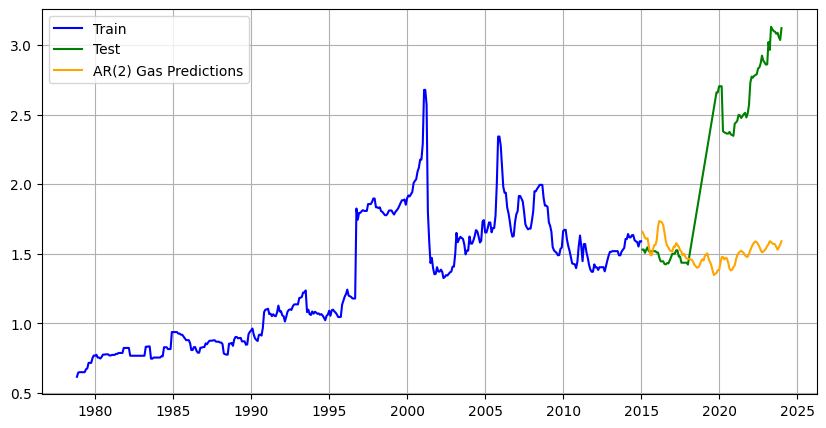

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['GAS'], label='Train', color='blue')
plt.plot(test.index, test['GAS'], label='Test', color='green')
plt.plot(test.index, gas_predictions2, label='AR(2) Gas Predictions', color='orange')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model3 = AutoReg(train['GAS'], lags=160)

In [ ]:
gas_fit3 = model3.fit()

In [ ]:
gas_fit3.params

const       0.053373
GAS.L1      1.201622
GAS.L2     -0.067323
GAS.L3     -0.383045
GAS.L4      0.161074
              ...   
GAS.L156    0.111840
GAS.L157   -0.178060
GAS.L158   -0.099165
GAS.L159    0.246549
GAS.L160   -0.102614
Length: 161, dtype: float64

In [ ]:
gas_predictions3 = gas_fit3.predict(start=start,end=end)
gas_predictions3 = gas_predictions3.rename('AR(3) Gas Predictions')

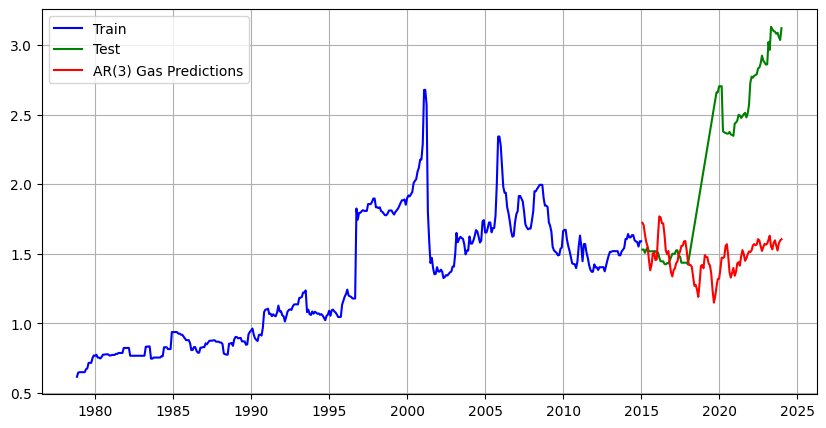

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['GAS'], label='Train', color='blue')
plt.plot(test.index, test['GAS'], label='Test', color='green')
plt.plot(test.index, gas_predictions3, label='AR(3) Gas Predictions', color='Red')
plt.grid(True)
plt.legend()
plt.show()

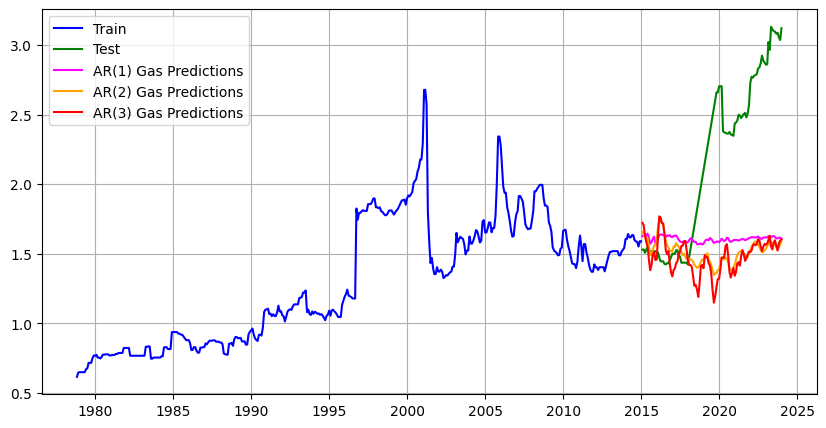

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['GAS'], label='Train', color='blue')
plt.plot(test.index, test['GAS'], label='Test', color='green')
plt.plot(test.index, gas_predictions1, label='AR(1) Gas Predictions', color='Magenta')
plt.plot(test.index, gas_predictions2, label='AR(2) Gas Predictions', color='Orange')
plt.plot(test.index, gas_predictions3, label='AR(3) Gas Predictions', color='Red')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
labels = ['AR(1) Gas Predictions','AR(2) Gas Predictions','AR(3) Gas Predictions']

In [ ]:
preds = [gas_predictions1,gas_predictions2,gas_predictions3]

In [ ]:
for i in range(3):
    mse = mean_squared_error(test['GAS'], preds[i])
    mae = mean_absolute_error(test['GAS'], preds[i])
    rmse = sqrt(mse)

    print(f'{labels[i]} MSE: {mse}')
    print(f'{labels[i]} MAE: {mae}')
    print(f'{labels[i]} RMSE: {rmse}\n')

AR(1) Gas Predictions MSE: 0.6653820616327546
AR(1) Gas Predictions MAE: 0.653052389903921
AR(1) Gas Predictions RMSE: 0.8157095448949673

AR(2) Gas Predictions MSE: 0.8029767952533085
AR(2) Gas Predictions MAE: 0.7160426185533
AR(2) Gas Predictions RMSE: 0.8960897250015248

AR(3) Gas Predictions MSE: 0.8350075878679856
AR(3) Gas Predictions MAE: 0.7423913107130635
AR(3) Gas Predictions RMSE: 0.9137874960120572



In [ ]:
gas_forecasted_values = gas_fit.predict(start=len(gas),end=len(gas)+60).rename('AR1 Gas Forecast')
gas_forecasted_values2 = gas_fit2.predict(start=len(gas),end=len(gas)+60).rename('AR2 Gas Forecast')
gas_forecasted_values3 = gas_fit3.predict(start=len(gas),end=len(gas)+60).rename('AR3 Gas Forecast')

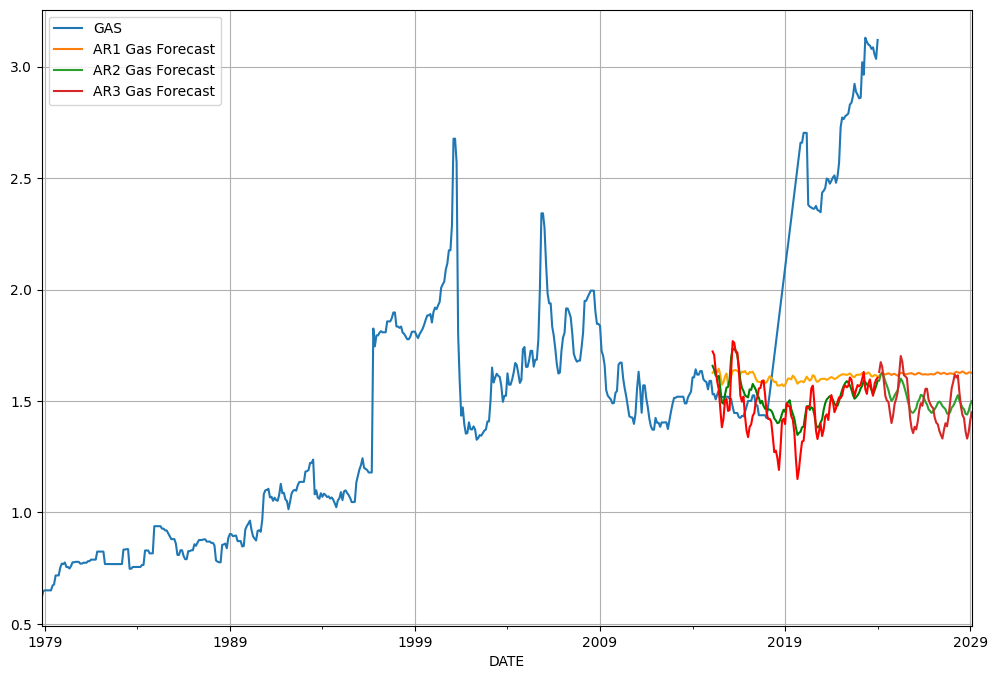

In [ ]:
gas['GAS'].plot(figsize=(12,8),legend=True)
gas_forecasted_values.plot(legend=True)
gas_forecasted_values2.plot(legend=True)
gas_forecasted_values3.plot(legend=True)
gas_predictions1.plot(color='orange')
gas_predictions2.plot(color='green')
gas_predictions3.plot(color='red')
plt.grid(True)

In [ ]:
# Create a range of future dates
last_date = gas.index[-1]  # Get the last date in your DataFrame
first_date = gas.index[0]
future_dates = pd.date_range(start=last_date, periods=60, freq='MS')[1:]  # Create 60 new monthly dates

In [ ]:
# Extend the DataFrame
future_gas = pd.DataFrame(index=future_dates, columns=gas.columns)  # Create a new DataFrame for the future dates
extended_gas = pd.concat([gas, future_gas])  # Concatenate the existing and future DataFrames

In [ ]:
# Append forecasted values
extended_gas.loc[future_dates, 'AR1 Gas Forecast'] = gas_forecasted_values[:len(future_dates)].values
extended_gas.loc[future_dates, 'AR2 Gas Forecast'] = gas_forecasted_values2[:len(future_dates)].values
extended_gas.loc[future_dates, 'AR3 Gas Forecast'] = gas_forecasted_values3[:len(future_dates)].values

In [ ]:
extended_gas['AR1 Gas Forecast'] = extended_gas['AR1 Gas Forecast'].astype('float')
extended_gas['AR2 Gas Forecast'] = extended_gas['AR2 Gas Forecast'].astype('float')
extended_gas['AR3 Gas Forecast'] = extended_gas['AR3 Gas Forecast'].astype('float')

In [ ]:
extended_gas[['GAS', 'AR1 Gas Forecast', 'AR2 Gas Forecast', 'AR3 Gas Forecast']]['2023-06-01':'2025-02-01']

,GAS,AR1 Gas Forecast,AR2 Gas Forecast,AR3 Gas Forecast
2023-06-01,3.112,NaN,NaN,NaN
2023-07-01,3.099,NaN,NaN,NaN
2023-08-01,3.095,NaN,NaN,NaN
2023-09-01,3.080,NaN,NaN,NaN
2023-10-01,3.087,NaN,NaN,NaN
2023-11-01,3.055,NaN,NaN,NaN
2023-12-01,3.035,NaN,NaN,NaN
2024-01-01,3.120,NaN,NaN,NaN
2024-02-01,NaN,1.611412,1.591546,1.629982
2024-03-01,NaN,1.621816,1.616627,1.674211


**Monthly Average Weather Readings for South Florida**

**From https://dev.meteostat.net/**




In [ ]:
# Install the meteostat package
!pip install meteostat
from meteostat import Stations
from datetime import datetime
from meteostat import Monthly
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
# Define latitude and longitude for Miami
latitude = 25.7617
longitude = -80.1918

In [ ]:
# Get nearby weather stations in Florida
stations = Stations()
stations = stations.nearby(latitude, longitude)
station = stations.fetch(1)  # Fetch data for the closest station

In [ ]:
# Print DataFrame
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
72202,Miami International Airport,US,FL,72202,KMIA,25.7833,-80.3167,4.0,America/New_York,1973-01-01,2024-02-26,1948-01-01,2024-12-30,1948-01-01,2022-01-01,12735.283267


In [ ]:
# Set the station ID and time period
station_id = '72202' # Station ID for weather station near/in Miami
start = datetime(2007, 1, 1)
end = datetime(2023, 12, 30)

In [ ]:
# Get Monthly data for the specified station
data = Monthly(station_id, start, end)
weather = data.fetch()

In [ ]:
weather.index = pd.to_datetime(weather.index)
weather.index.freq = 'MS'
weather.sort_index(ascending=False, inplace=True)

In [ ]:
# Handle missing values
weather = weather.fillna(method='ffill').fillna(method='bfill')

In [ ]:
# Month and Year from the index
weather['month'] = weather.index.month
weather['year'] = weather.index.year

In [ ]:
weather = weather.rename(columns={'tavg': 'AVG_TEMP'})

In [ ]:
weather.reset_index(inplace=True)
weather.rename(columns={'time': 'DATE'}, inplace=True)
weather.set_index('DATE', inplace=True)

In [ ]:
weather = weather[['AVG_TEMP', 'year', 'month']]

In [ ]:
# Calculate mean only for numeric columns
numeric_mean = weather.mean(numeric_only=True)

In [ ]:
weather.fillna(numeric_mean, inplace=True)

In [ ]:
weather = weather.iloc[::-1]

In [ ]:
print(weather)
print(weather.dtypes)

# Save the DataFrame as a text file
#data.to_csv('weather_data.txt', sep='\t', index=False)
#data.to_excel('weather_data.xlsx', index=False)

from google.colab import files
# files.download('weather_data.txt')  # Download the text file
# files.download('weather_data.xlsx') # Download excel file

            AVG_TEMP  year  month
DATE                             
2007-01-01      22.5  2007      1
2007-02-01      20.6  2007      2
2007-03-01      23.2  2007      3
2007-04-01      23.8  2007      4
2007-05-01      25.9  2007      5
...              ...   ...    ...
2023-08-01      29.9  2023      8
2023-09-01      28.7  2023      9
2023-10-01      27.5  2023     10
2023-11-01      25.3  2023     11
2023-12-01      21.9  2023     12

[204 rows x 3 columns]
AVG_TEMP    float64
year          int64
month         int64
dtype: object


In [ ]:
weather.columns

Index(['AVG_TEMP', 'year', 'month'], dtype='object')

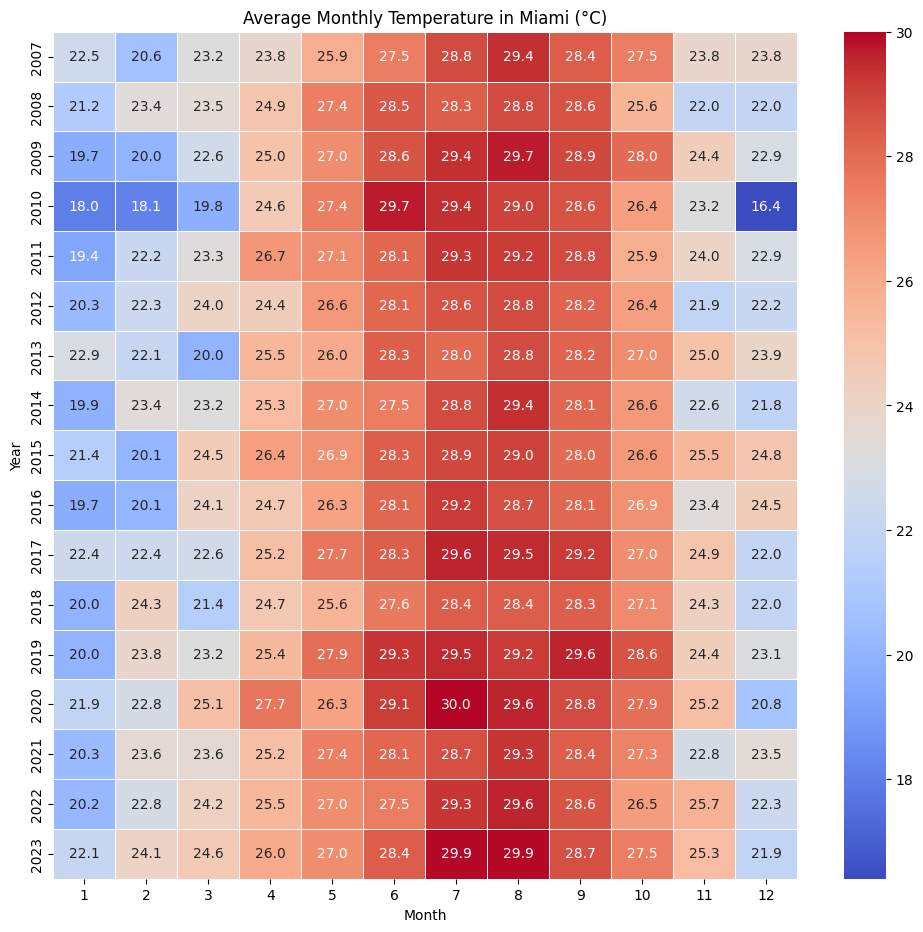

In [ ]:
# Pivot the DataFrame for the heatmap
pivot_df = weather.pivot_table(index='year', columns='month', values='AVG_TEMP', aggfunc='mean')
plt.figure(figsize=(12, 11))
sns.heatmap(pivot_df, cmap="coolwarm", annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Monthly Temperature in Miami (°C)')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

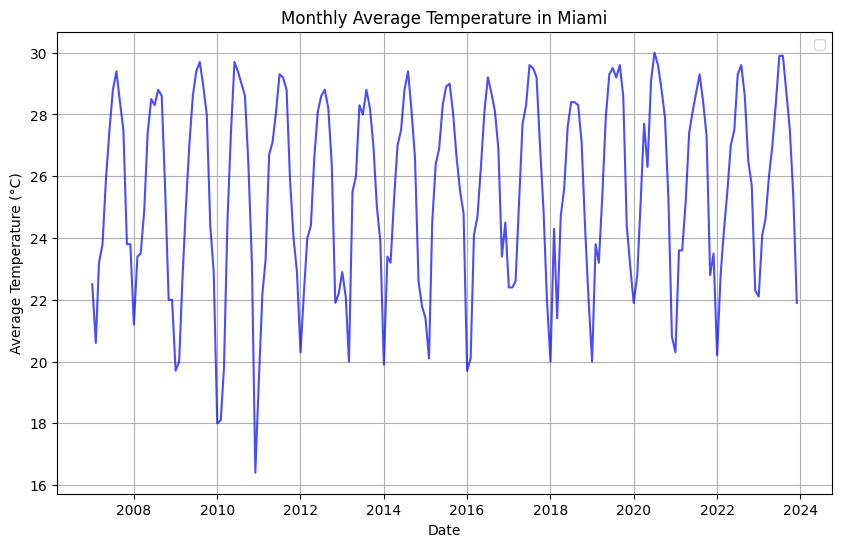

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(weather['AVG_TEMP'], color='blue', alpha=0.7)
plt.title('Monthly Average Temperature in Miami')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
len(weather)

204

In [ ]:
204-41

163

In [ ]:
train = weather.iloc[:163]
test = weather.iloc[163:]

In [ ]:
model = AutoReg(train['AVG_TEMP'], lags=1)

In [ ]:
weather_fit = model.fit()

In [ ]:
start = test.index[0]  # Start at the beginning of the test set
end = test.index[-1]  # End at the last point of the test set

In [ ]:
start

Timestamp('2020-08-01 00:00:00')

In [ ]:
end

Timestamp('2023-12-01 00:00:00')

In [ ]:
weather_fit.predict(start=start,end=end)

2020-08-01    29.022393
2020-09-01    28.263387
2020-10-01    27.674100
2020-11-01    27.216583
2020-12-01    26.861370
2021-01-01    26.585586
2021-02-01    26.371469
2021-03-01    26.205230
2021-04-01    26.076163
2021-05-01    25.975957
2021-06-01    25.898158
2021-07-01    25.837755
2021-08-01    25.790859
2021-09-01    25.754449
2021-10-01    25.726181
2021-11-01    25.704234
2021-12-01    25.687194
2022-01-01    25.673964
2022-02-01    25.663693
2022-03-01    25.655719
2022-04-01    25.649527
2022-05-01    25.644720
2022-06-01    25.640988
2022-07-01    25.638091
2022-08-01    25.635841
2022-09-01    25.634094
2022-10-01    25.632738
2022-11-01    25.631686
2022-12-01    25.630868
2023-01-01    25.630234
2023-02-01    25.629741
2023-03-01    25.629358
2023-04-01    25.629061
2023-05-01    25.628831
2023-06-01    25.628652
2023-07-01    25.628513
2023-08-01    25.628405
2023-09-01    25.628321
2023-10-01    25.628256
2023-11-01    25.628205
2023-12-01    25.628166
Freq: MS, dtype:

In [ ]:
weather_predictions1 = weather_fit.predict(start=start,end=end)
weather_predictions1 = weather_predictions1.rename('AR(1) Weather Predictions')

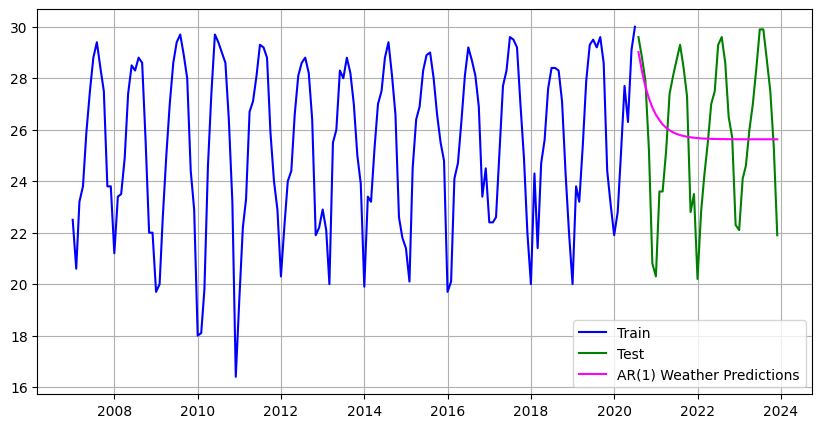

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['AVG_TEMP'], label='Train', color='blue')
plt.plot(test.index, test['AVG_TEMP'], label='Test', color='green')
plt.plot(test.index, weather_predictions1, label='AR(1) Weather Predictions', color='Magenta')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model2 = AutoReg(train['AVG_TEMP'], lags=12)

In [ ]:
weather_fit2 = model2.fit()

In [ ]:
weather_predictions2 = weather_fit2.predict(start=start,end=end)
weather_predictions2 = weather_predictions2.rename('AR(2) Weather Predictions')

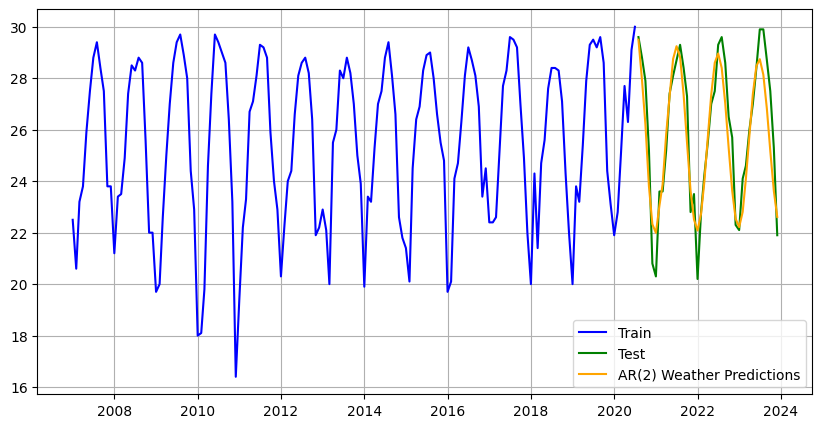

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['AVG_TEMP'], label='Train', color='blue')
plt.plot(test.index, test['AVG_TEMP'], label='Test', color='green')
plt.plot(test.index, weather_predictions2, label='AR(2) Weather Predictions', color='orange')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model3 = AutoReg(train['AVG_TEMP'], lags=24)

In [ ]:
weather_fit3 = model3.fit()

In [ ]:
weather_fit3.params

const           10.675242
AVG_TEMP.L1      0.360030
AVG_TEMP.L2     -0.008566
AVG_TEMP.L3     -0.029022
AVG_TEMP.L4     -0.057040
AVG_TEMP.L5     -0.018312
AVG_TEMP.L6     -0.064807
AVG_TEMP.L7     -0.027556
AVG_TEMP.L8     -0.015347
AVG_TEMP.L9     -0.085538
AVG_TEMP.L10     0.249241
AVG_TEMP.L11    -0.017168
AVG_TEMP.L12     0.113105
AVG_TEMP.L13     0.058959
AVG_TEMP.L14     0.086706
AVG_TEMP.L15    -0.178693
AVG_TEMP.L16     0.132205
AVG_TEMP.L17    -0.052514
AVG_TEMP.L18    -0.005968
AVG_TEMP.L19    -0.012076
AVG_TEMP.L20    -0.064768
AVG_TEMP.L21     0.015923
AVG_TEMP.L22    -0.009483
AVG_TEMP.L23     0.129370
AVG_TEMP.L24     0.083846
dtype: float64

In [ ]:
weather_predictions3 = weather_fit3.predict(start=start,end=end)
weather_predictions3 = weather_predictions3.rename('AR(3) Weather Predictions')

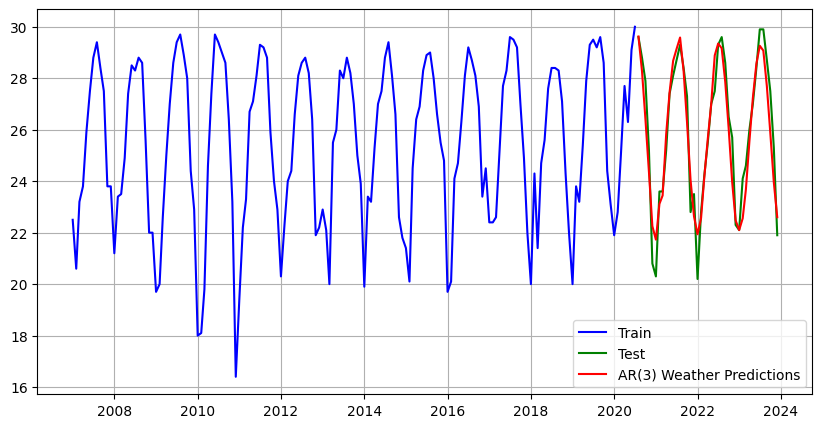

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['AVG_TEMP'], label='Train', color='blue')
plt.plot(test.index, test['AVG_TEMP'], label='Test', color='green')
plt.plot(test.index, weather_predictions3, label='AR(3) Weather Predictions', color='Red')
plt.grid(True)
plt.legend()
plt.show()

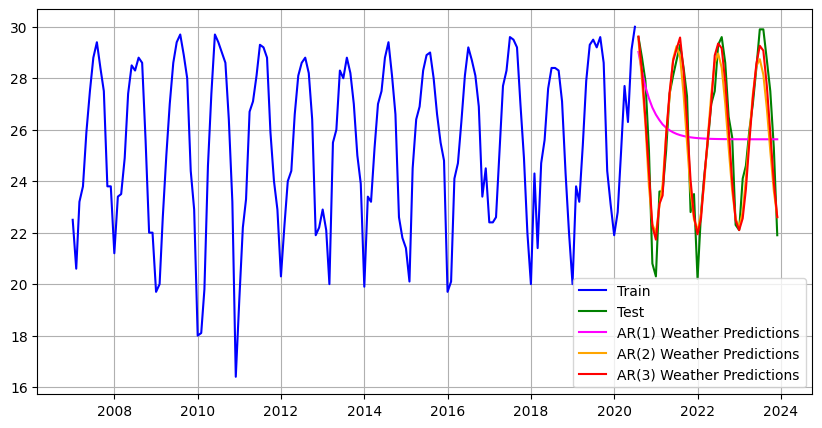

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['AVG_TEMP'], label='Train', color='blue')
plt.plot(test.index, test['AVG_TEMP'], label='Test', color='green')
plt.plot(test.index, weather_predictions1, label='AR(1) Weather Predictions', color='Magenta')
plt.plot(test.index, weather_predictions2, label='AR(2) Weather Predictions', color='Orange')
plt.plot(test.index, weather_predictions3, label='AR(3) Weather Predictions', color='Red')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
labels = ['AR(1) Weather Predictions','AR(2) Weather Predictions','AR(3) Weather Predictions']

In [ ]:
preds = [weather_predictions1,weather_predictions2,weather_predictions3]

In [ ]:
for i in range(3):
    mse = mean_squared_error(test['AVG_TEMP'], preds[i])
    mae = mean_absolute_error(test['AVG_TEMP'], preds[i])
    rmse = sqrt(mse)

    print(f'{labels[i]} MSE: {mse}')
    print(f'{labels[i]} MAE: {mae}')
    print(f'{labels[i]} RMSE: {rmse}\n')

AR(1) Weather Predictions MSE: 8.065125443162707
AR(1) Weather Predictions MAE: 2.3762406630919353
AR(1) Weather Predictions RMSE: 2.8399164500320615

AR(2) Weather Predictions MSE: 1.2744779365541565
AR(2) Weather Predictions MAE: 0.9213080228126751
AR(2) Weather Predictions RMSE: 1.1289277818151862

AR(3) Weather Predictions MSE: 0.7686826840866339
AR(3) Weather Predictions MAE: 0.6885923049894829
AR(3) Weather Predictions RMSE: 0.8767455070239218



In [ ]:
weather_forecasted_values = weather_fit.predict(start=len(weather),end=len(weather)+60).rename('AR1 Weather Forecast')
weather_forecasted_values2 = weather_fit2.predict(start=len(weather),end=len(weather)+60).rename('AR2 Weather Forecast')
weather_forecasted_values3 = weather_fit3.predict(start=len(weather),end=len(weather)+60).rename('AR3 Weather Forecast')

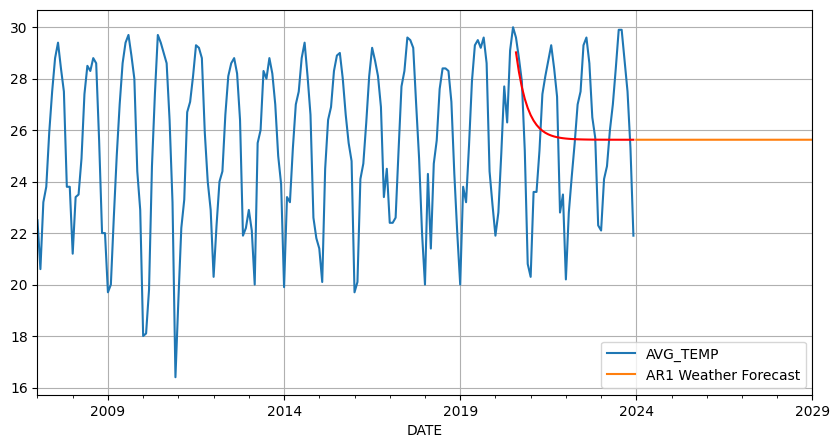

In [ ]:
weather['AVG_TEMP'].plot(figsize=(10,5),legend=True)
weather_forecasted_values.plot(legend=True)
weather_predictions1.plot(color='red')
plt.grid(True)

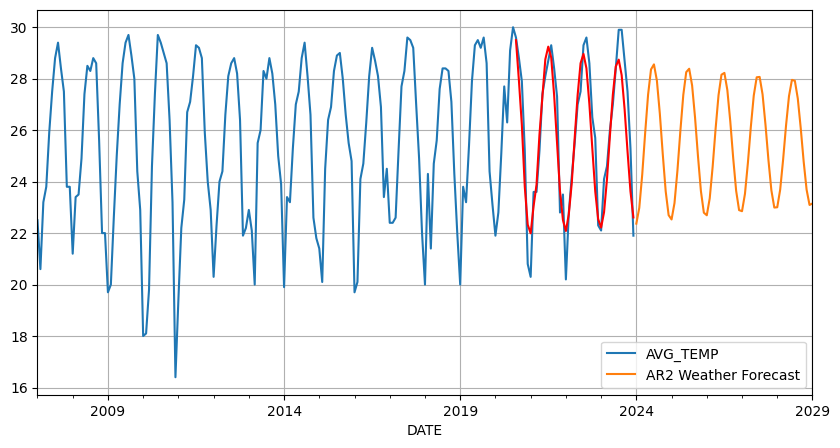

In [ ]:
weather['AVG_TEMP'].plot(figsize=(10,5),legend=True)
weather_forecasted_values2.plot(legend=True)
weather_predictions2.plot(color='red')
plt.grid(True)

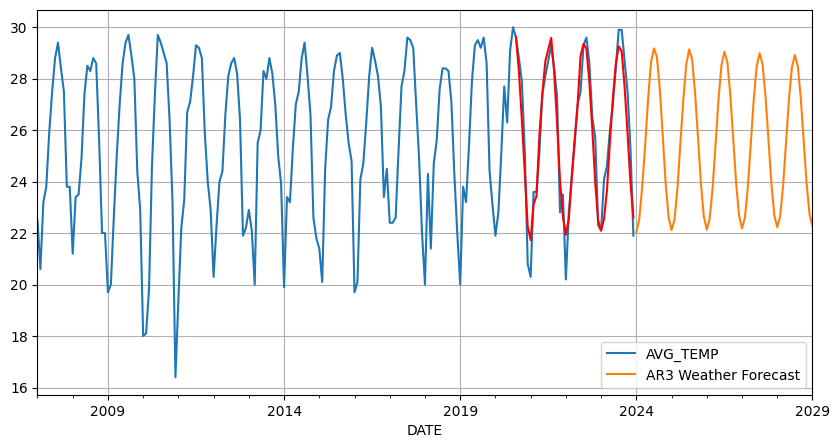

In [ ]:
weather['AVG_TEMP'].plot(figsize=(10,5),legend=True)
weather_forecasted_values3.plot(legend=True)
weather_predictions3.plot(color='red')
plt.grid(True)

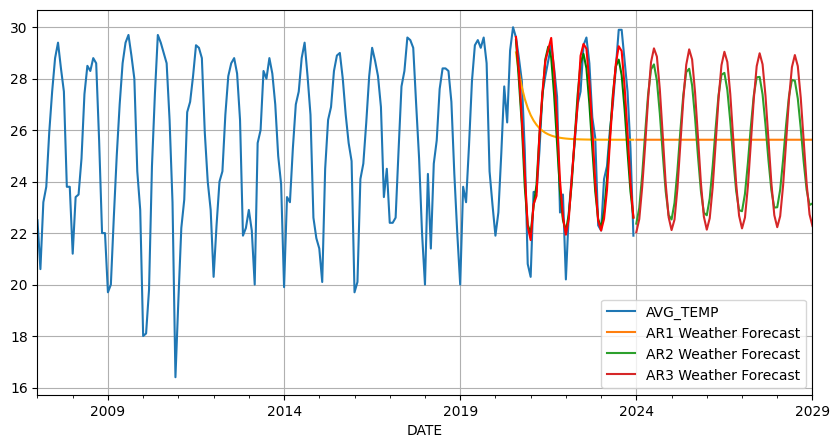

In [ ]:
weather['AVG_TEMP'].plot(figsize=(10,5),legend=True)
weather_forecasted_values.plot(legend=True)
weather_forecasted_values2.plot(legend=True)
weather_forecasted_values3.plot(legend=True)
weather_predictions1.plot(color='orange')
weather_predictions2.plot(color='green')
weather_predictions3.plot(color='red')
plt.grid(True)

In [ ]:
# Create a range of future dates
last_date = weather.index[-1]  # Get the last date in your DataFrame
first_date = weather.index[0]
future_dates = pd.date_range(start=last_date, periods=60, freq='MS')[1:]  # Create 60 new monthly dates

In [ ]:
# Extend the DataFrame
future_df = pd.DataFrame(index=future_dates, columns=weather.columns)
extended_weather = pd.concat([weather, future_df])

In [ ]:
# Append forecasted values
extended_weather.loc[future_dates, 'AR1 Weather Forecast'] = weather_forecasted_values[:len(future_dates)].values
extended_weather.loc[future_dates, 'AR2 Weather Forecast'] = weather_forecasted_values2[:len(future_dates)].values
extended_weather.loc[future_dates, 'AR3 Weather Forecast'] = weather_forecasted_values3[:len(future_dates)].values

In [ ]:
extended_weather['AR1 Weather Forecast'] = extended_weather['AR1 Weather Forecast'].astype('float')
extended_weather['AR2 Weather Forecast'] = extended_weather['AR2 Weather Forecast'].astype('float')
extended_weather['AR3 Weather Forecast'] = extended_weather['AR3 Weather Forecast'].astype('float')

In [ ]:
extended_weather[['AVG_TEMP', 'AR1 Weather Forecast', 'AR2 Weather Forecast', 'AR3 Weather Forecast']]['2023-06-01':'2025-02-01']

,AVG_TEMP,AR1 Weather Forecast,AR2 Weather Forecast,AR3 Weather Forecast
2023-06-01,28.4,NaN,NaN,NaN
2023-07-01,29.9,NaN,NaN,NaN
2023-08-01,29.9,NaN,NaN,NaN
2023-09-01,28.7,NaN,NaN,NaN
2023-10-01,27.5,NaN,NaN,NaN
2023-11-01,25.3,NaN,NaN,NaN
2023-12-01,21.9,NaN,NaN,NaN
2024-01-01,NaN,25.628136,22.368265,22.033592
2024-02-01,NaN,25.628112,22.981654,22.545897
2024-03-01,NaN,25.628094,24.265457,23.799375
